Функция генерации определенного количества СВ
Выборки: 10, 100, 1000, 10000, 100000

Случайные величины:
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла 

Для выборок:
1) посчитать оценки (мат ожидание, СКО в 2 видах - смещенное, несмещенное, медиана)
2) добавить шум в данные (до 20% мощности сигнала). Попробовать вписать данные в функцию, посчитать корреляцию и ковариацию для исходного и зашумленного ряда
    1) шум распределен по этому же закону
    2) по некоторому другому

In [38]:
import scipy.stats as sps
import scipy.ndimage as snd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
%matplotlib inline

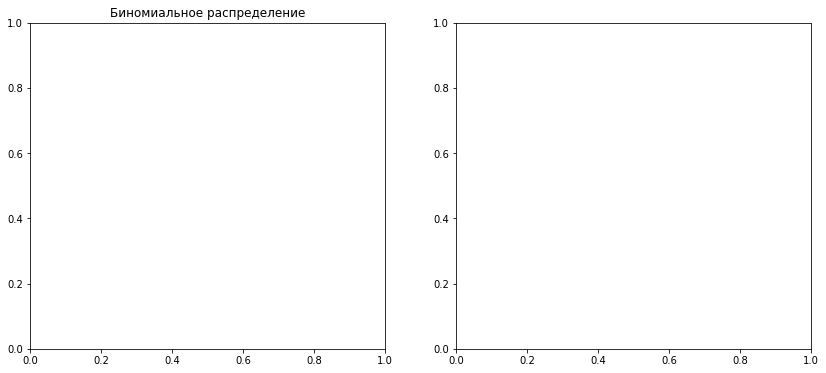

In [18]:
fig = plt.figure(figsize=(14,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

yMax = 1
xMax = 1


ax1.set(xlim = (0, xMax), ylim = (0, yMax), title = "Биномиальное распределение")


#line1, = ax1.plot([], [], 'r', lw=2)     # ax.plot returns a list of 2D line objects
#line2, = ax2.plot([], [], 'g', lw=2)
means = []
#line3, = ax3.plot([], [], 'b', lw=2)

# список размеров выборки
data_size = [10, 20, 40, 100, 1000, 10000, 100000]

In [66]:
# n - кол-во испытаний
# p - вероятность успеха
DefaultModels = {
    "binomial" : sps.binom(n = 10, p = 0.5),
    "bernoulli": sps.bernoulli(p = 0.5),
    "geom": sps.geom(p = 0.5),
    "poisson" : sps.poisson(mu = 0.6),
    "exponential" : sps.expon(),
    "uniform" : sps.uniform(),
    "normal" : sps.norm(),
    "hi-squared" : sps.chi2(df = 55),
    "student" : sps.t(df = 2.74),
    #"fisher" : ,
    "weibull" : sps.weibull_min(c = 1.79)
}
ListOfModels = list(DefaultModels.keys())

discrete = [0, 1, 2, 3]

In [69]:
# animation function. This is called sequentially
def drawframe(n, *args):
    print('#####################')
    print("FRAME = ", n)

    (means, lawName) = args
    #rvs, ideal = BinomLaw(10, 0.5, data_size[n])
    givenLaw = DefaultModels[lawName]
    lawIndex = ListOfModels.index(lawName)
    rvs = givenLaw.rvs(data_size[n])
    means.append(rvs.mean())

    xMin = givenLaw.ppf(0.01)
    xMax = givenLaw.ppf(0.99)

    xTicks = []
    probFun = []

    if lawIndex in discrete:
        xTicks = np.arange(xMin, xMax)
        probFun = givenLaw.pmf(xTicks)
    else:
        xTicks = np.linspace(xMin, xMax, 10)
        probFun = givenLaw.pdf(xTicks)

    ax1.clear()
    ax1.set_xticks(xTicks)
    ax1.set(xlim = (xMin, xMax), ylim = (0, yMax), title = "Выборка: " + str(data_size[n]))
    ax1.hist(rvs, bins = 10, range=(xMin, xMax), rwidth=0.8, density=True)
    ax1.plot(xTicks, probFun, 'r-', lw = 2)

    ax2.clear()
    ax2.set(xlim = (0, len(data_size)),
            ylim = (min(means) - 0.25, max(means) + 0.25),
            xticklabels=list(map(str, data_size))
            )
    ax2.hlines(y=givenLaw.mean(), xmin=0, xmax=len(data_size), lw=1, colors='red')
    ax2.plot(means)


    #return line2,

In [58]:
from matplotlib import animation, rc


def AnimateParam(lawIndex):
    means = []
    args = (means, lawIndex)
    anim = animation.FuncAnimation(fig, drawframe, fargs=args, frames = len(data_size), interval = 1000, blit=False)
    rc('animation', html='jshtml')
    #plt.show()
    return anim

In [64]:
AnimateParam("binomial")

#####################
FRAME =  0
0
#####################
FRAME =  0
0


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  1
0
#####################
FRAME =  2
0


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  3
0


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  4
0


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  5
0


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1767534642.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  6
0


In [68]:
AnimateParam("bernoulli")

#####################
FRAME =  0
1
[0, 1, 2, 3]
#####################
FRAME =  0
1
[0, 1, 2, 3]


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  1
1
[0, 1, 2, 3]


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  2
1
[0, 1, 2, 3]
#####################
FRAME =  3
1
[0, 1, 2, 3]
#####################
FRAME =  4
1
[0, 1, 2, 3]


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  5
1
[0, 1, 2, 3]
#####################
FRAME =  6


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\2373035659.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


1
[0, 1, 2, 3]


In [70]:
AnimateParam("poisson")

#####################
FRAME =  0
#####################
FRAME =  0


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  1
#####################
FRAME =  

C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


2
#####################
FRAME =  3


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),


#####################
FRAME =  4
#####################
FRAME =  5
#####################
FRAME =  6


C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
C:\Users\blood\AppData\Local\Temp\ipykernel_19684\1753627393.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(xlim = (0, len(data_size)),
